# Matematický software 

## Cv. 10 - Numerická derivace


### Cognitive Apprenticeship

V tomto cvičení si ukážeme jak provádět derivaci funkci v nějakém bodě, nalézt její symbolický předpis, nalézt předpis limity a procvičíme si znalosti z předchozích hodin.

In [2]:
!python -m pip install scipy

You should consider upgrading via the 'C:\Users\P\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [1]:
import scipy
import sympy
import matplotlib.pyplot as plt
import numpy

#### Taylorova věta

Hledáme funkci $g$, která nejlépe aproximuje funkci $f$ tak, aby platilo:
$$f(c)=g(c), f'(c)=g'(c), ..., f^{(n)}(c)=g^{(n)}(c)$$
Rozvoj funkce $f(x)$ v bodě c
$$f(x)=f(c)+\frac{f'(c)}{1!}(x-c)+...+\frac{f^n(c)}{n!}(x-c)^n+...$$

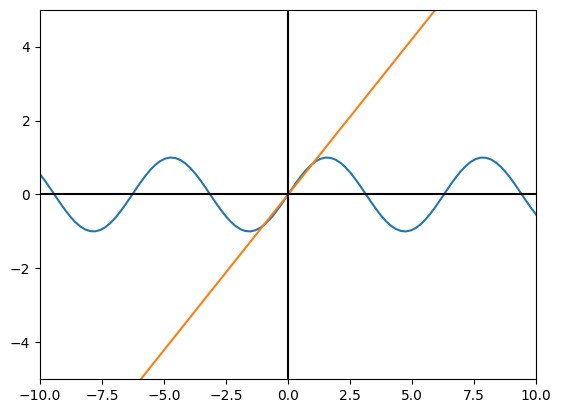

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import approximate_taylor_polynomial

x = np.linspace(-10.0, 10.0, num=100)
degree = 1

plt.plot(x, np.sin(x))
sin_taylor = approximate_taylor_polynomial(np.sin, 0, degree, 1)    # fce sin(x), v bodě x=0, stupeň, šířka intervalu
plt.plot(x, sin_taylor(x))

plt.axis([-10, 10, -5, 5])                                          # rozsahy os (x, y)
plt.axhline(y = 0, color='k')                                       # vykreslení osy x
plt.axvline(x = 0, color='k')                                       # vykreslení osy y
plt.show()

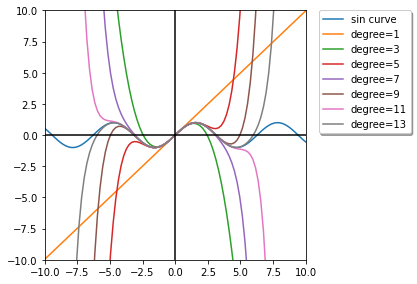

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import approximate_taylor_polynomial

x = np.linspace(-10.0, 10.0, num=100)

plt.plot(x, np.sin(x), label="sin curve")

for degree in np.arange(1, 15, step=2):             # 1, 3, 5 ... 13
    sin_taylor = approximate_taylor_polynomial(np.sin, 0, degree, 1, order=degree + 2)
    plt.plot(x, sin_taylor(x), label=f"degree={degree}")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.0, shadow=True)
plt.axhline(y = 0, color='k')                                       # vykreslení osy x
plt.axvline(x = 0, color='k')                                       # vykreslení osy y
plt.tight_layout()
plt.axis([-10, 10, -10, 10])
plt.show()

#### Symbolické manipulace

<!--img src="MS10_soubory/symuprava1.png" alt="Drawing" style="width: 600px;"/-->

<font color='green'>Pomocí symbolických manipulací upravte následující výraz</font>
$$\frac{1-\frac{x}{y}}{\frac{x-y^2}{x}}$$

In [40]:
x, y = sympy.symbols('x y')
sympy.simplify((1-x/y)/(x-y**2/x))

-x/(y*(x + y))

Řešení rovnic

In [39]:
y="a+b"
a, b = sympy.symbols('a b')
vars = sympy.var("a b")
print(vars)
print(sympy.solve(y,  vars))
print(sympy.solve(y,  a))


(a, b)
[(-b, b)]
[-b]


#### Kvadratická rovnice

<!--img src="MS10_soubory/symkvadr.png" alt="Drawing" style="width: 650px;"/-->

<font color='green'>Pomocí symbolických manipulací vyřešte kvadratickou rovnici</font>
$$ax^2+bx+c=0$$
Uvažujte takové sady koeficientů $(a,b,c)$, aby byly zohledněny všechny možnosti řešení rovnice.

In [29]:
y = 'a * x ** 2 + b * x + c'
vars = sympy.var('x a b c')         # všechny symboly jako proměnné

print(sympy.solve(y,  vars))        # řeší y(a,b,c,x) pro všechny proměnné a, b, c, x
print(sympy.solve(y,  x))           # řeší y(a,b,c,x) pro x, ostatní považuje za konstanty

[(x, -(b*x + c)/x**2, b, c)]
[(-b + sqrt(-4*a*c + b**2))/(2*a), -(b + sqrt(-4*a*c + b**2))/(2*a)]


#### Soustava lineární rovnic

<!--img src="MS10_soubory/soustava.png" alt="Drawing" style="width: 500px;"/-->

<font color='green'>Nagenerujte náhodně soustavu N rovnic a vyřešte ji pomocí:</font>
* Iterační metody
* Cramerova pravidla
* Symbolické matematiky
<p><font color='green'>Jednotlivá řešení porovnejte z hlediska rychlosti a stability</font>

In [12]:
import random
import numpy as np
import sympy
import string
import time

def print_matrix(A, b):                                     # vytiskne matici A a vektor b
    print("Matrix A:")
    for row in A:
        print(row)
    print("RHS b:\n", b)

def jacobi(A, b, niteraci, x0=None):                        # Jacobiho iterační metoda
    x = x0 if x0 else np.ones(len(A))                       # pokud není zadáno x0, samé jedničky
    D = np.diag(A)
    #L = np.tril(A, k = -1)
    #U = np.triu(A, k = 1)
    R = A - np.diagflat(D)                                  # R totéž jako L + U
    for i in range(niteraci):
        x = (b - np.dot(R,x))/D                             # totéž jako dot
    return x

def cramer(A, b):                                           # Cramerovo pravidlo
    N = A.shape[1]
    mask = np.broadcast_to(np.diag([1 for i in range(N)]), [N, N, N]).swapaxes(0, 1)
    Ai = np.where(mask, np.repeat(b, N).reshape(N, N), A)
    x = np.linalg.det(Ai) / np.linalg.det(A)
    return x

def symbolicke_reseni(A, b):                                # pomocí SymPy
    N = A.shape[1]
    s = sympy.symbols(','.join(string.ascii_lowercase[0:N]))
    rows = []
    for i in range(N):
        str_expr = "+".join([f"{A[i,j]}*{s[j]}" for j in range(N)])
        sympy_eq = sympy.sympify(str_expr)
        rows.append(sympy.Eq(sympy_eq, b[i]))
    x = sympy.solve(rows, s)
    return x

def generate_random_matrix(n, amin, amax):                  # generuje matici A a vektor b
    A = np.array([[random.randint(amin, amax) for j in range(n)] for i in range(n)])
    b = np.array([random.randint(amin, amax) for i in range(n)])
    A = A + 10*np.eye(n)             # diagonálně dominantní pro konvergenci iterační metody
    return A, b

def testcase():
    A = np.array([[4, -2, 1],[1, -3, 2],[-1, 2, 6]])
    b = np.array([1, 2, 3])
    return A, b

dim = 3                                                    # vyzkoušejte i další případy
A, b = generate_random_matrix(n=dim, amin=-10, amax=10)     # generuje matici A a vektor b
#A, b = testcase()
#print_matrix(A, b)                                          # vytiskne matici A a vektor b
print("Determinant:", np.linalg.det(A))

start = time.time()
x_iter = jacobi(A, b, 20)                                   # Jacobiho iterační metoda
end = time.time()
print(f"\n\nIteracni reseni (t = {end-start}s):\n{x_iter}\n\n")

start = time.time()
x_cramer = cramer(A, b)                                     # Cramerovo pravidlo
end = time.time()
print(f"Cramer reseni: (t = {end-start}s):\n{x_cramer}\n\n")

start = time.time()
x_symbolicky = symbolicke_reseni(A, b)                      # pomocí SymPy
end = time.time()
print(f"Symbolicke reseni: (t = {end-start}s):\n{x_symbolicky}\n")

Determinant: 1697.9999999999993


Iteracni reseni (t = 0.0s):
[0.0035407  0.31800744 0.77739004]


Cramer reseni: (t = 0.0s):
[0.00353357 0.3180212  0.77738516]


Symbolicke reseni: (t = 0.10332512855529785s):
{a: 0.00353356890459364, b: 0.318021201413428, c: 0.777385159010601}



#### Limity

In [7]:
x, y = sympy.symbols('x y')
vyraz = x*x - 2*x*y
x0 = 0
limita_vyrazu = sympy.limit(vyraz, x, x0)
print(limita_vyrazu)
print(sympy.limit(1/x,x,0, dir="+-"))

0
zoo


In [8]:
lim = sympy.Limit(vyraz, x, x0)
lim

Limit(x**2 - 2*x*y, x, 0)

In [52]:
lim.doit()

0

<font color='green'>Pomocí symbolické matematiky vypočítejte následující limity</font>
$$\begin{align*}
&\lim\limits _{x\rightarrow3} ^{} \frac{2x^3-1}{x^2-2x+10}\\
&\lim\limits _{x\rightarrow2-} ^{} \frac{x^2+x-2}{x-2}\\
&\lim\limits _{x\rightarrow 0} ^{} e^{\frac{1}{sin(x)}}\\
&\lim\limits _{x\rightarrow e} ^{} \frac{ln(x)-1}{x-e}
\end{align*}$$

In [ ]:
x = sympy.symbols('x')
vyraz = (2*x**3 - 1)/(x**2 - 2*x + 10)
x0 = 3
limita_vyrazu = sympy.limit(vyraz, x, x0)
print(limita_vyrazu)

53/13


In [ ]:
x = sympy.symbols('x')
vyraz = (x**2 + x - 2)/(x - 2)
x0 = 2
limita_vyrazu = sympy.limit(vyraz, x, x0, dir='-')
print(limita_vyrazu)

-oo


In [ ]:
x = sympy.symbols('x')
vyraz = sympy.exp(1/sympy.sin(x))
x0 = 0
limita_vyrazu = sympy.limit(vyraz, x, x0)
print(limita_vyrazu)

limita_vyrazu = sympy.limit(vyraz, x, x0, dir='-')
print(limita_vyrazu)

oo
0


In [ ]:
x = sympy.symbols('x')
vyraz = (sympy.log(x) - 1)/(x-sympy.E)
x0 = sympy.E
limita_vyrazu = sympy.limit(vyraz, x, x0)
print(limita_vyrazu)

exp(-1)


### Výpočet derivace

<!--img src="MS10_soubory/vypocetderivace.png" alt="Drawing" style="width: 600px;"/-->

- analyticky
$$
f'(c)=\lim\limits _{h\rightarrow0} ^{} \frac{f(c+h)-f(c)}{h}
$$
- přibližný výpočet - numerická derivace
$$f'(c)=\frac{f(c+h)-f(c)}{h}+O(h^2)$$

#### Analytický výpočet derivace

In [10]:
x, y = sympy.symbols('x y')
vyraz = x*x - 2*x*y

derivace_vyrazu = sympy.diff(vyraz, x)      # pokud jen jedna proměnná, není 2. argument nutný
print(derivace_vyrazu)
derivace_vyrazu

2*x - 2*y


2*x - 2*y

In [18]:
vyraz1 = x*x - 2*x
dce = sympy.Derivative(vyraz1, x)                   # výpis derivace
dce


Derivative(x**2 - 2*x, x)

In [19]:
dce.doit()

2*x - 2

In [20]:
vyraz2 = x*x - 2*x*y
dce = sympy.Derivative(vyraz2, x)                   # výpis parciální derivace
dce

Derivative(x**2 - 2*x*y, x)

In [21]:
dce.doit()

2*x - 2*y

#### Numerický výpočet derivace

In [22]:
from scipy.misc import derivative

def f(x):
    return x**2 + 1

derivative(f, 5, dx=1e-6)

10.00000000139778

\begin{align*}
f'(x_0)&=\frac{f(x_0+h)-f(x_0)}{h}\\
f'(x_0)&=\frac{f(x_0)-f(x_0-h)}{h}\\
f'(x_0)&=\frac{f(x_0+h)-f(x_0-h)}{2h}
\end{align*}


In [ ]:
def forward_derivate(f, x0, h):
    return (f(x0+h) - f(x0))/h

def backward_derivate(f, x0, h):
    return (f(x0) - f(x0-h))/h

def central_derivate(f, x0, h):
    return (f(x0+h) - f(x0-h))/(2*h)

f = lambda x: x**2
x0 = 2
h = 0.1

print(forward_derivate(f, x0, h))
print(backward_derivate(f, x0, h))
print(central_derivate(f, x0, h))

4.100000000000001
3.9000000000000012
4.000000000000001


#### Derivace

<!--img src="MS10_soubory/odhadderivace.png" alt="Drawing" style="width: 600px;"/-->


Porovnejte dva numerické odhady derivace funkce $f(x)=sin(x)$ na intervalu $\langle0,\pi\rangle$ s přesným řešením získaným například pomocí symbolické matematiky.

Interval pro numerický odhad rozdělte na $n={4,8,12,16,20,30}$ subintervalů. Spočítejte celkovou chybu derivace jako
$$globErr=\sum\limits_{i=1}^{n}|f_i'-f'(x_i)|$$

In [47]:
import sympy
import numpy as np

def forward_derivate(f, x0, h):             # dopředná
    return (f(x0+h) - f(x0))/h

def central_derivate(f, x0, h):             # centrální
    return (f(x0+h) - f(x0-h))/(2*h)

x = sympy.symbols('x')
dx = sympy.diff(sympy.sin(x), x)

f = lambda x: np.sin(x)

xmin = 0
xmax = np.pi
ns = [4, 8, 12, 16, 20, 30]

for n in ns:
    xs = np.linspace(xmin, xmax, n)
    # pro každé x spočítat rozdíl num. a analytické, vše sečíst
    ge_forward = sum([abs(forward_derivate(f, xi, 0.001) - dx.evalf(subs={x: xi})) for xi in xs])
    ge_central = sum([abs(central_derivate(f, xi, 0.001) - dx.evalf(subs={x: xi})) for xi in xs])
    print(f"pocet intervalu: {n},\tchyba dopredne: {ge_forward},\tchyba central: {ge_central}")

pocet intervalu: 4,	chyba dopredne: 0.000866358664985634,	chyba central: 5.00000217340535E-7
pocet intervalu: 8,	chyba dopredne: 0.00219097628452147,	chyba central: 9.15660154254816E-7
pocet intervalu: 12,	chyba dopredne: 0.00347790942923898,	chyba central: 0.00000133777947530778
pocet intervalu: 16,	chyba dopredne: 0.00475751516344571,	chyba central: 0.00000176112916334958
pocet intervalu: 20,	chyba dopredne: 0.00603443546954903,	chyba central: 0.00000218492822050276
pocet intervalu: 30,	chyba dopredne: 0.00922228993173103,	chyba central: 0.00000324516831248789


<img src="MS10_soubory/derivace3body.png" alt="Drawing" style="width: 600px;"/>

In [48]:
import sympy
import numpy as np

def twopoint_forward_derivate(f, x0, h):
    return (f(x0+h) - f(x0))/h

def threepoint_forward_derivate(f, x0, h):
    #return (f(x0-h) -4*f(x0) + 3*f(x0+h))/(2*h)
    return (-3*f(x0) + 4*f(x0+h) - f(x0+2*h))/(2*h)

x = sympy.symbols('x')
dx = sympy.diff(sympy.sin(x), x)

f = lambda x: np.sin(x)

xmin = 0
xmax = np.pi
ns = [4, 8, 12, 16, 20, 30]

for n in ns:
    xs = np.linspace(xmin, xmax, n)
    ge_twopoint = sum([abs(twopoint_forward_derivate(f, xi, 0.001) - dx.evalf(subs={x: xi})) for xi in xs])
    ge_threepoint = sum([abs(threepoint_forward_derivate(f, xi, 0.001) - dx.evalf(subs={x: xi})) for xi in xs])
    print(f"pocet intervalu: {n},\tchyba dvoubodove: {ge_twopoint}\tchyba tribodove: {ge_threepoint}")

pocet intervalu: 4,	chyba dvoubodove: 0.000866358664985634	chyba tribodove: 9.99998963524540E-7
pocet intervalu: 8,	chyba dvoubodove: 0.00219097628452147	chyba tribodove: 0.00000183131876829723
pocet intervalu: 12,	chyba dvoubodove: 0.00347790942923898	chyba tribodove: 0.00000267555727140323
pocet intervalu: 16,	chyba dvoubodove: 0.00475751516344571	chyba tribodove: 0.00000352225562232078
pocet intervalu: 20,	chyba dvoubodove: 0.00603443546954903	chyba tribodove: 0.00000436985253977895
pocet intervalu: 30,	chyba dvoubodove: 0.00922228993173103	chyba tribodove: 0.00000649033133751087
